# Lista 1 - Econometria das Séries Financeiras
Ref: Aula 20/4/2016

Bruno Campos

Pedro Mattos #333791

Renata Polete #330696




Prof: Gustavo Soares


Importando algumas bibliotecas que serão utilizadas:

In [1]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from pandas.tools.plotting import autocorrelation_plot
from yahoo_finance import Share
import statsmodels as sm
import statsmodels.api as sma

## Item: Crie 5 séries de preço ajustado para 5 ativos de diferentes classes de ativo e calcule os log-returns diários, semanais e mensais da série.

Criando a lista de ações e capturando os preços:

In [2]:
stocks = ['BRPR3.SA','ENBR3.SA','BVMF3.SA','PETR4.SA','VALE5.SA']

prices = pd.DataFrame()
for stock in stocks:
    s = Share(stock).get_historical('2000-01-01', '2015-12-31')
    s = pd.DataFrame(s).pivot_table(index = "Date", columns = "Symbol", values = "Adj_Close",aggfunc = "last")
    prices = pd.concat([prices, s],axis=1)



In [3]:
prices.index = pd.to_datetime(prices.index)    
prices = prices["2006-01-01":]
prices = prices.replace(to_replace='NaN',value=np.nan)
prices = prices.fillna(method='ffill')
# prices = prices.fillna(method='bfill')
prices = prices.convert_objects(convert_numeric=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [4]:
dailyPrices = prices
dailyPrices.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-02,NaN,3.76599,NaN,14.87216,16.07684
2006-01-03,NaN,3.79368,NaN,15.34070,16.75587
2006-01-04,NaN,3.84906,NaN,15.41488,16.94715
2006-01-05,NaN,3.91829,NaN,15.38365,17.06382
2006-01-06,NaN,4.06921,NaN,15.94980,17.03705


In [5]:
weeklyPrices = prices.resample(rule="W").last()
weeklyPrices.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-08,NaN,4.06921,NaN,15.94980,17.03705
2006-01-15,NaN,4.25751,NaN,16.63308,17.69504
2006-01-22,NaN,4.12597,NaN,17.27732,17.96091
2006-01-29,NaN,4.59674,NaN,17.56625,18.47736
2006-02-05,NaN,4.56903,NaN,17.25389,17.67400


In [6]:
monthlyPrices = prices.resample(rule="M").last()
monthlyPrices.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-31,NaN,4.63686,NaN,18.35105,18.70690
2006-02-28,NaN,4.49979,NaN,17.46083,17.29144
2006-03-31,NaN,4.17996,NaN,16.84392,17.88632
2006-04-30,NaN,4.29211,NaN,18.35867,17.69313
2006-05-31,NaN,3.87675,NaN,17.47310,16.84768


In [7]:
dailyReturns = dailyPrices.pct_change()
dailyReturns.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-02,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,0.007353,NaN,0.031505,0.042237
2006-01-04,NaN,0.014598,NaN,0.004836,0.011416
2006-01-05,NaN,0.017986,NaN,-0.002026,0.006884
2006-01-06,NaN,0.038517,NaN,0.036802,-0.001569


In [8]:
weeklyReturns = weeklyPrices.pct_change()
weeklyReturns.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-08,NaN,NaN,NaN,NaN,NaN
2006-01-15,NaN,0.046274,NaN,0.042839,0.038621
2006-01-22,NaN,-0.030896,NaN,0.038732,0.015025
2006-01-29,NaN,0.114099,NaN,0.016723,0.028754
2006-02-05,NaN,-0.006028,NaN,-0.017782,-0.043478


In [9]:
monthlyReturns = monthlyPrices.pct_change()
monthlyReturns.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-31,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,-0.029561,NaN,-0.048511,-0.075665
2006-03-31,NaN,-0.071077,NaN,-0.035331,0.034403
2006-04-30,NaN,0.026830,NaN,0.089929,-0.010801
2006-05-31,NaN,-0.096773,NaN,-0.048237,-0.047784


# Item: Estatísticas Descritivas e hipótese de log normalidade

## Daily Returns

In [10]:
dailyReturns.mean()

Symbol
BRPR3.SA    0.000308
ENBR3.SA    0.000654
BVMF3.SA    0.000337
PETR4.SA    0.000034
VALE5.SA    0.000110
dtype: float64

In [11]:
dailyReturns.skew()

Symbol
BRPR3.SA    0.134271
ENBR3.SA    0.194469
BVMF3.SA    0.189159
PETR4.SA    0.227549
VALE5.SA    0.136003
dtype: float64

In [12]:
dailyReturns.kurt()

Symbol
BRPR3.SA    2.419748
ENBR3.SA    2.693506
BVMF3.SA    1.120494
PETR4.SA    3.724426
VALE5.SA    3.783333
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B72BA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B65C1D0>]], dtype=object)

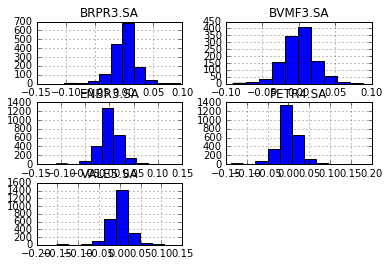

In [13]:
dailyReturns.hist()

As médias são muito próximas de zero, o que corrobora com a hipótese de log normalidade. Porém as assimetrias são positivas. As curtoses são razoavelmente diferente de 3 para todos os ativos.

## Weekly Returns

In [14]:
weeklyReturns.mean()

Symbol
BRPR3.SA    0.001296
ENBR3.SA    0.002903
BVMF3.SA    0.001769
PETR4.SA   -0.000143
VALE5.SA    0.000212
dtype: float64

In [15]:
weeklyReturns.skew()

Symbol
BRPR3.SA   -0.009248
ENBR3.SA    0.173600
BVMF3.SA    0.090321
PETR4.SA   -0.040946
VALE5.SA    0.415477
dtype: float64

In [16]:
weeklyReturns.kurt()

Symbol
BRPR3.SA    0.765345
ENBR3.SA    1.222890
BVMF3.SA    0.771828
PETR4.SA    1.610172
VALE5.SA    2.185269
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AF46D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0D2B70>]], dtype=object)

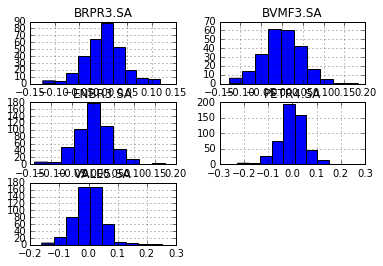

In [17]:
weeklyReturns.hist()

As médias são muito próximas de zero, o que corrobora com a hipótese de log normalidade. As assimetrias são próximas de zero também, exceto por ENBR3 e VALE5. Porém as caudas são todas mais leves do que a normal.

## Monthly Returns

In [18]:
monthlyReturns.mean()

Symbol
BRPR3.SA    0.005648
ENBR3.SA    0.010418
BVMF3.SA    0.006405
PETR4.SA   -0.002410
VALE5.SA   -0.001394
dtype: float64

In [19]:
monthlyReturns.skew()

Symbol
BRPR3.SA    0.608098
ENBR3.SA    0.052785
BVMF3.SA   -0.059387
PETR4.SA    0.038654
VALE5.SA    0.210973
dtype: float64

In [20]:
monthlyReturns.kurt()

Symbol
BRPR3.SA    1.642662
ENBR3.SA   -0.056832
BVMF3.SA   -0.568101
PETR4.SA    0.577951
VALE5.SA    0.726542
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B5D90B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B69A400>]], dtype=object)

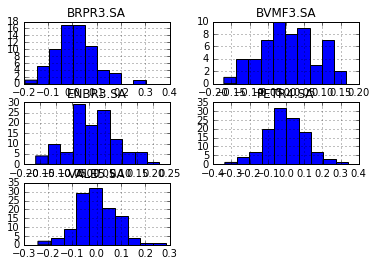

In [21]:
monthlyReturns.hist()

As médias são muito próximas de zero, o que corrobora com a hipótese de log normalidade. As assimetruas de BRPR3 e VALE5 são distantes de zero e as caudas são todas bastante leves.

## Conclusão

A hipótese de log-normalidade não parece ser válida. Porém encotramos o fato estilizado de que as médias são ligeiramente positivas, não encontramos muitas assimetrias negativas e surpreendentemente encontramos curtoses mais leves.

a hipótese de log-normalidade é ainda assim utilizada pois em diversos casos e modelos é muito difícil encontrar uma solução analítica sem assumir esta hipótese como verdadeira.

# Item: Calcule a FAC dos log-retornos diários, semanais e mensais e ajuste um modelo ARIMA


## Autocorrelação

In [22]:
def plotAutoCorr(returns):
    for stock in returns.columns:
        plt.figure()
        plt.title(stock)
        autocorrelation_plot(returns[stock].dropna()) 

### Daily

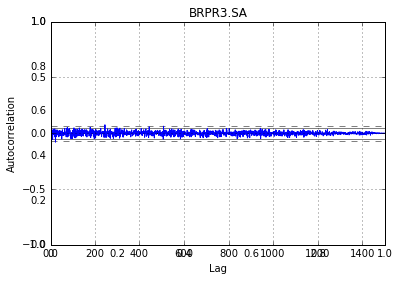

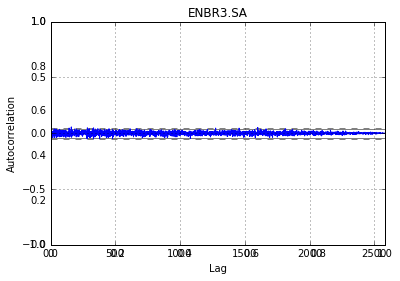

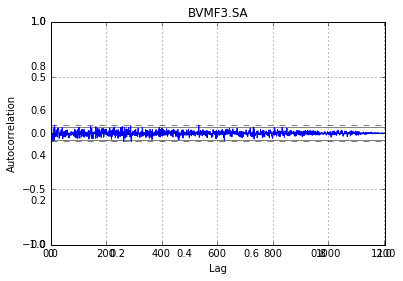

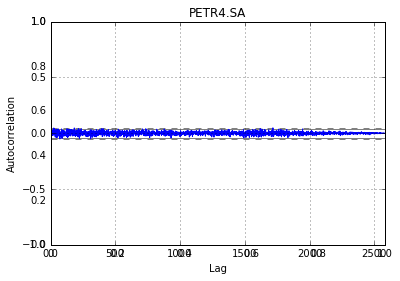

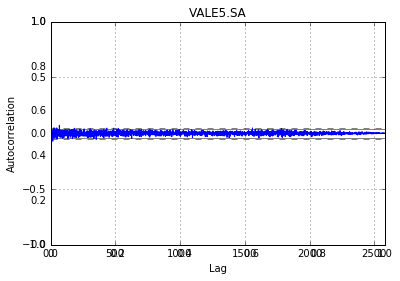

In [23]:
plotAutoCorr(dailyReturns)

### Weekly

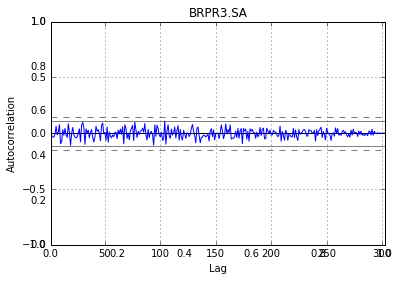

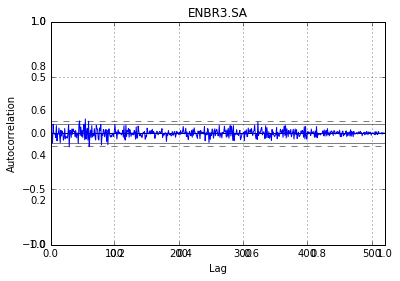

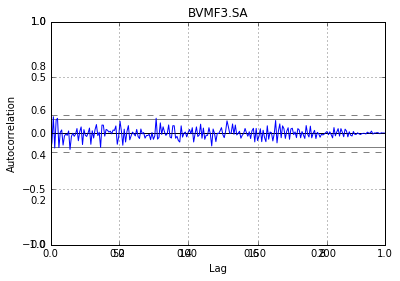

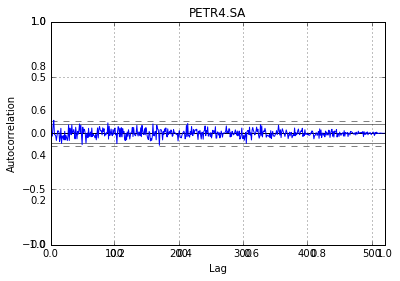

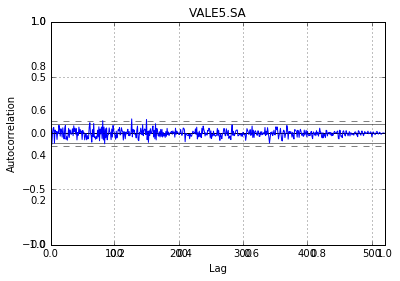

In [24]:
plotAutoCorr(weeklyReturns)

### Monthly

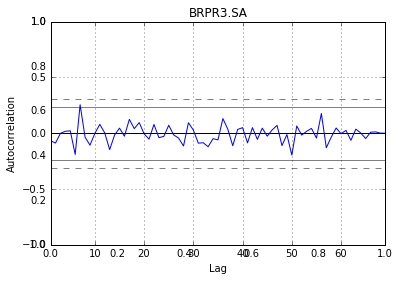

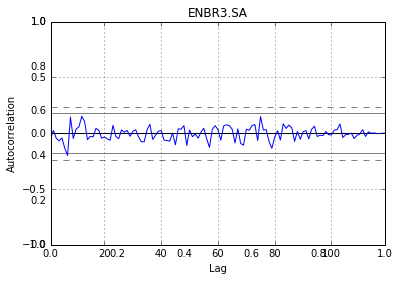

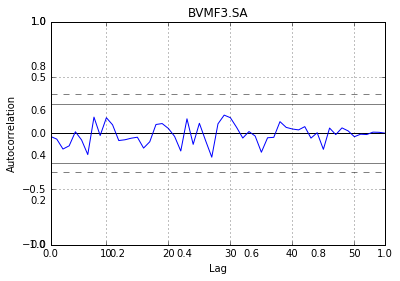

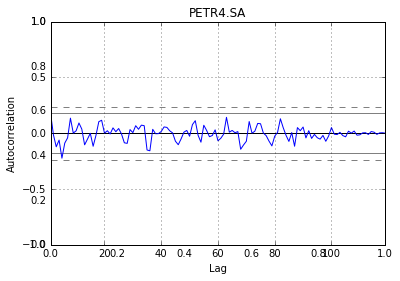

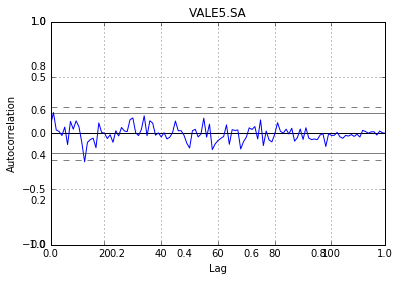

In [25]:
plotAutoCorr(monthlyReturns)

Podemos observar que em quase todos os casos a autocorrelação não é estatísticamente diferente de zero. Exceto por alguns casos pontuais que não possuem interpretação lógica. Consideramos estes casos como aleatoriedade.

## ARIMA Model

In [26]:
def estimateArimaForStocks(data,p=2,d=2,q=0):
    for stock in data.columns:
        print('\n\n\n\n Stocks: ' + stock + '\n\n')
        model = sm.tsa.arima_model.ARIMA(data[stock].dropna(), (p,d,q)).fit()
        print(model.summary())

### Daily

In [27]:
estimateArimaForStocks(dailyReturns)





 Stocks: BRPR3.SA


                             ARIMA Model Results                              
Dep. Variable:            D2.BRPR3.SA   No. Observations:                 1502
Model:                 ARIMA(2, 2, 0)   Log Likelihood                3075.440
Method:                       css-mle   S.D. of innovations              0.031
Date:                Mon, 02 May 2016   AIC                          -6142.880
Time:                        09:08:04   BIC                          -6121.622
Sample:                    03-11-2010   HQIC                         -6134.961
                         - 12-31-2015                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const             -7.649e-07      0.000     -0.002      0.998        -0.001     0.001
ar.L1.D2.BRPR3.SA    -1.0474      0.023    -46.100      0.000        -1.092    -1.003


### Weekly

In [28]:
estimateArimaForStocks(weeklyReturns)





 Stocks: BRPR3.SA


                             ARIMA Model Results                              
Dep. Variable:            D2.BRPR3.SA   No. Observations:                  301
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 401.833
Method:                       css-mle   S.D. of innovations              0.064
Date:                Mon, 02 May 2016   AIC                           -795.667
Time:                        09:08:05   BIC                           -780.839
Sample:                    04-04-2010   HQIC                          -789.733
                         - 01-03-2016                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              2.456e-05      0.001      0.017      0.987        -0.003     0.003
ar.L1.D2.BRPR3.SA    -1.0180      0.050    -20.493      0.000        -1.115    -0.921


### Monthly

In [29]:
estimateArimaForStocks(monthlyReturns)





 Stocks: BRPR3.SA


                             ARIMA Model Results                              
Dep. Variable:            D2.BRPR3.SA   No. Observations:                   67
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  38.243
Method:                       css-mle   S.D. of innovations              0.136
Date:                Mon, 02 May 2016   AIC                            -68.486
Time:                        09:08:06   BIC                            -59.667
Sample:                    06-30-2010   HQIC                           -64.996
                         - 12-31-2015                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                -0.0013      0.007     -0.195      0.846        -0.014     0.012
ar.L1.D2.BRPR3.SA    -0.9953      0.104     -9.551      0.000        -1.200    -0.791


### Conclusão

Para os dados diários não encontramos o resultado esperado, pois utilizando um ARMA(2,2) os coeficientes dos primeiro e segundo lags apresentam significância para quase todas as ações.

Nos dados semanais é um pouco ambíguo, a maior parte das ações não demonstra estrutura de correlação.

Para dados mensais encontramos o resultado esperado no sentido de parecer não haver estrutura de correlação @ 1% significância.

# Item: Calcule a FAC do quadrado log-returns diários,semanais e mensais. FAC e a FACP de $r^2$ e ajustar modelo ARIMA.

In [55]:
def plotFacFacp(data):
    for stock in data.columns:
#         print('\n\n\n\n Stocks: ' + stock + '\n\n')
        fig = plt.figure(figsize=(12,8))
        plt.title(stock, y=1.08)
        ax1 = fig.add_subplot(211)
        fig = sma.graphics.tsa.plot_acf(dailySquared[stock].dropna(), lags=40, ax=ax1)
        ax2 = fig.add_subplot(212)
        fig = sma.graphics.tsa.plot_pacf(dailySquared[stock].dropna(), lags=40, ax=ax2)
        


In [56]:
dailySquared = dailyReturns ** 2
weeklySquared = weeklyReturns ** 2
monthlySquared = monthlyReturns ** 2

## Squared daily returns

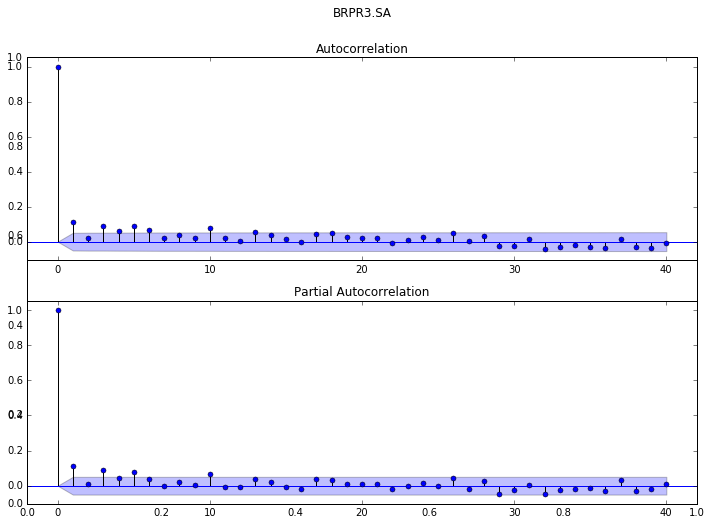

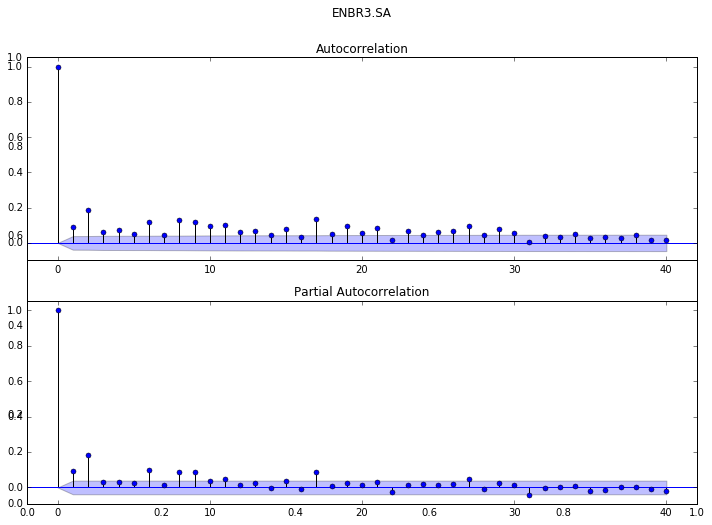

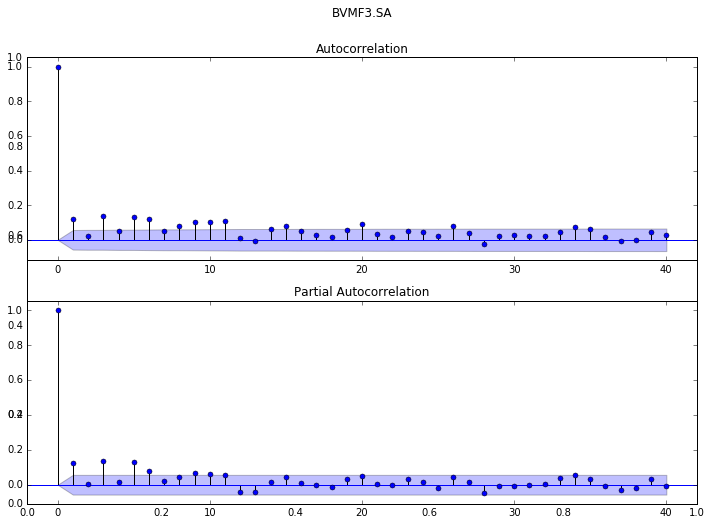

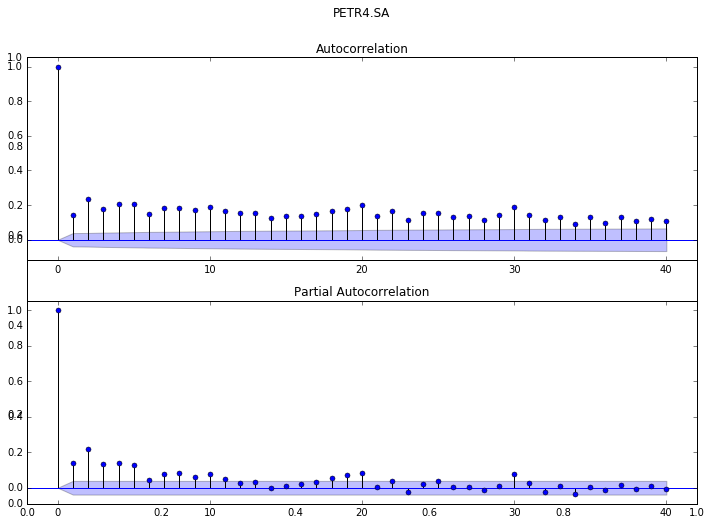

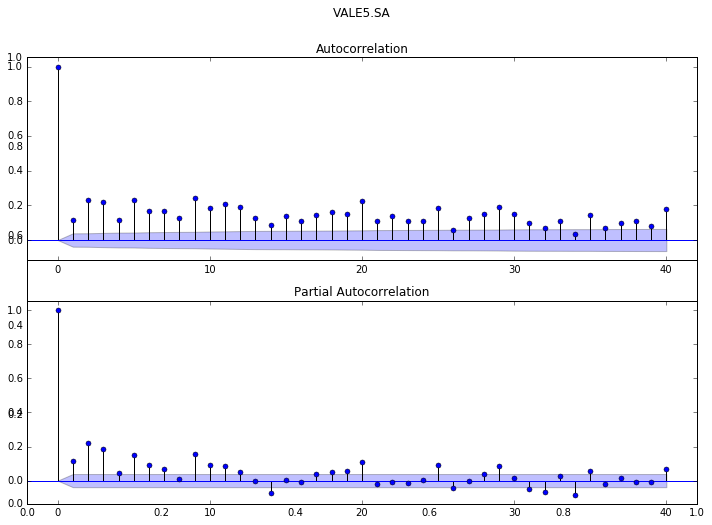

In [58]:
plotFacFacp(dailySquared)


Podemos observar que os primeiros lags, para a maioria das açõesm são relevantes tanto em termos de autocorrelação como autocorrelação parcial. Podemos ainda observar, para PETR4 e VALE5 que parece haver sazonalidade. A fim de ajustar os modelos com os mesmos parâmetros escolhemos ajustar um ARMA(5,2).

In [60]:
estimateArimaForStocks(dailySquared,p=5,d=2,q=0)





 Stocks: BRPR3.SA


                             ARIMA Model Results                              
Dep. Variable:            D2.BRPR3.SA   No. Observations:                 1502
Model:                 ARIMA(5, 2, 0)   Log Likelihood                8252.472
Method:                       css-mle   S.D. of innovations              0.001
Date:                Mon, 02 May 2016   AIC                         -16490.944
Time:                        09:29:17   BIC                         -16453.742
Sample:                    03-11-2010   HQIC                        -16477.086
                         - 12-31-2015                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const             -7.633e-08   4.19e-06     -0.018      0.985     -8.29e-06  8.14e-06
ar.L1.D2.BRPR3.SA    -1.4016      0.025    -57.186      0.000        -1.450    -1.354


Podemos observar que exceto pela constante os demais parâmetros são diferentes de zero. O que faz sentido vez que a série em nível tem média zero. O modelo parece estar mais bem ajustado. Isto está de acordo com o esperado, que os retornos ao quadrado possuam melhor ajuste.

## Squared weekly returns



In [62]:
estimateArimaForStocks(weeklySquared,p=5,d=2,q=0)





 Stocks: BRPR3.SA


                             ARIMA Model Results                              
Dep. Variable:            D2.BRPR3.SA   No. Observations:                  301
Model:                 ARIMA(5, 2, 0)   Log Likelihood                1302.548
Method:                       css-mle   S.D. of innovations              0.003
Date:                Mon, 02 May 2016   AIC                          -2591.096
Time:                        09:42:33   BIC                          -2565.146
Sample:                    04-04-2010   HQIC                         -2580.712
                         - 01-03-2016                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const             -2.569e-06      3e-05     -0.086      0.932     -6.14e-05  5.63e-05
ar.L1.D2.BRPR3.SA    -1.3857      0.055    -25.257      0.000        -1.493    -1.278


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:            D2.ENBR3.SA   No. Observations:                  519
Model:                 ARIMA(5, 2, 0)   Log Likelihood                2135.297
Method:                       css-mle   S.D. of innovations              0.004
Date:                Mon, 02 May 2016   AIC                          -4256.593
Time:                        09:42:34   BIC                          -4226.830
Sample:                    01-29-2006   HQIC                         -4244.933
                         - 01-03-2016                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              -2.14e-07      3e-05     -0.007      0.994     -5.89e-05  5.85e-05
ar.L1.D2.ENBR3.SA    -1.3363      0.042    -31.582      0.000        -1.419    -1.253
ar.L2.D2.ENBR3.SA    -1.

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:            D2.PETR4.SA   No. Observations:                  519
Model:                 ARIMA(5, 2, 0)   Log Likelihood                1850.379
Method:                       css-mle   S.D. of innovations              0.007
Date:                Mon, 02 May 2016   AIC                          -3686.757
Time:                        09:42:35   BIC                          -3656.994
Sample:                    01-29-2006   HQIC                         -3675.097
                         - 01-03-2016                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const             -5.629e-07   5.74e-05     -0.010      0.992        -0.000     0.000
ar.L1.D2.PETR4.SA    -1.4119      0.043    -32.712      0.000        -1.496    -1.327
ar.L2.D2.PETR4.SA    -1.

Em geral temos resultados parecidos com o anterior, dentro do esperado. Coeficientes siginificantes exceto pela constante.